In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\bsnra\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from chandassu.check_lakshanam import *
from chandassu.padyam_config import *
from chandassu.laghuvu_guruvu import LaghuvuGuruvu

TYPE_TO_BHEDAM_MAP= {
                        'kandamu': Jaathi,

                        'aataveladi': VupaJaathi, 
                        'teytageethi': VupaJaathi, 
                        'seesamu': VupaJaathi,

                        'vutpalamaala': Vruttamu, 
                        'champakamaala': Vruttamu,
                        'mattebhamu': Vruttamu,
                        'saardulamu': Vruttamu
                    }

In [9]:
data= """తొండము నేక దంతమును తోరపు బొజ్జయు వామ హస్తమున్
మెండుగ మ్రోయు గజ్జెలును మెల్లని చూపులు మందహాసమున్
కొండొక గుజ్జు రూపమున కోరిన విద్యలకెల్ల నొజ్జవై
యుండెడి పార్వతీ తనయ యోయి గణాధిప నీకు మ్రొక్కెదన్"""

lg_data= LaghuvuGuruvu( data= data ).generate()
type= "champakamaala"
verbose= False

In [10]:
bhedam= TYPE_TO_BHEDAM_MAP[type]

if verbose:
    print("Type: ", type)
    print("Bhedam: ", bhedam)

config= getattr(bhedam, type, False)

# Holds Laghuvu-Guruvu data for each Paadam (Padyam line)
padamwise_ganam_data= []

gana_kramam_score= 0
end= 0
paadam_count= 0

In [11]:
# Parse with respect to each line of padyam (Paadam)
for line in range( len( config["gana_kramam"] ) ):

    ganam_data= []

    for j in range( len(config["gana_kramam"][line]) ):

        ganam_match_flag= False
        
        if verbose:
            print( config["gana_kramam"][line][j])

        for i in config["gana_kramam"][line][j]:

            # Take legth of corresponding ganam
            ganam= tuple([k[1] for k in lg_data[end: end+len(ganamulu[i]) ]])
            
            if verbose:
                print("Ganam : ", ganam)

            try:
                # If matched
                if r_ganamulu[ ganam ] == i:
                    
                    ganam_data.append( [lg_data[end: end+len(ganamulu[i])], r_ganamulu[ganam]] )

                    # Increment 'Gana Kramam Score'
                    gana_kramam_score+= 1
                    
                    if verbose:
                        print( [lg_data[end: end+len(ganamulu[i])], r_ganamulu[ganam]] )

                    ganam_match_flag= True

                    break
            
            except KeyError as e:

                if verbose:
                    print( "Key Not Found: ", ganam )
                    print( "Exception: ", str(e) )

            except Exception as e:
                print(e)
                pass
        
        # If ganam not matched then unmatched tracing
        if ganam_match_flag == False:
            ganam_data.append( [lg_data[end: end+len(ganamulu[i])], "UnMatched"] )
        
        # Increment with the last ganam length (maximum)
        end+= len(ganamulu[i])

    if verbose:
        print( line, end, len(lg_data), ganam_data )
    
    # Consider atleast one character to consider new line as paadam
    if len(ganam_data[0][0]) > 1:
        paadam_count+= 1

    padamwise_ganam_data.append( ganam_data )
    
    if end == len(lg_data):
        if verbose:
            print("Paadam wise split completed")
        break


In [20]:
len(padamwise_ganam_data[0]), padamwise_ganam_data[0][0][0]

(7, [('తొం', 'U'), ('డ', '|'), ('ము', '|')])

In [ ]:
padamwise_ganam_data= [ paadam_1, paadam_2, paadam_3, ..., paadam_n ]

paadam_n= [ ganam_match_1, ganam_match_2, ganam_match_3, ..., ganam_match_n ]

ganam_match_n= [ LaghuvuGuruvu_data, Matched/ UnMatched flag]

In [2]:
os.getcwd()

'c:\\Users\\bsnra\\Desktop\\chandassu\\examples'

In [3]:
base_path= r"c:\\Users\\bsnra\\Desktop\\chandassu\\dataset\\score"
os.chdir( base_path )

merged_df= pd.DataFrame()

for satakam in os.listdir():

    df= pd.read_excel( satakam )

    if merged_df.shape[0] == 0:
        merged_df= df

    merged_df= pd.concat( [merged_df, df] )

In [4]:
merged_df["satakam"]= merged_df["satakam"].str.title()

In [5]:
merged_df.head(1)

,type,padyam,class,satakam,lg,chandassu_score,n_aksharalu_score,n_paadalu_score,gana_kramam_score,yati_sthanam_score,prasa_score
0,seesamu,శ్రీమదనంత లక్ష్మీ యుతోరః స్థల- చతురాననాండ పూరి...,vruttamu,Aandhranaayaka,"[('శ్రీ', 'U'), ('మ', '|'), ('ద', '|'), ('నం',...",0.802083,-1.0,1.0,0.78125,0.625,-1.0


### Our Results

In [7]:
print( f"Chandassu Score      : {round( 100*merged_df['chandassu_score'].mean(), 2 )}%" )
print( f"N-Paadaalu Score     : {round( 100*merged_df['n_paadalu_score'].mean(), 2 )}%" )
print( f"Gana Kramam Score    : {round( 100*merged_df['gana_kramam_score'].mean(), 2 )}%" )
print( f"Yati Sthanam Score   : {round( 100*merged_df['yati_sthanam_score'].mean(), 2 )}%" )

Chandassu Score      : 91.22%
N-Paadaalu Score     : 99.94%
Gana Kramam Score    : 93.42%
Yati Sthanam Score   : 77.68%


In [8]:
# These depend on the 'Class' of Padyam
temp= merged_df[ (merged_df["n_aksharalu_score"] != -1) ]

print( f"N-Aksharalu Score    : {round( 100*temp['n_aksharalu_score'].mean(), 2 )}%" )

N-Aksharalu Score    : 99.43%


In [9]:
# These depend on the 'Class' of Padyam
temp= merged_df[ (merged_df["prasa_score"] != -1) ]

print( f"Prasa Score          : {round( 100*temp['prasa_score'].mean(), 2 )}%" )

Prasa Score          : 94.54%


### Satakam-wise Evaluation

In [10]:
chandassu_score= (merged_df.groupby( "satakam" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'Maathru': 96.67142857142858,
 'Chiravibhava': 96.46825396825398,
 'Bharga': 96.0583451202263,
 'Srikaalahasteeswara': 95.67114740633096,
 'Ontimittaraguveera': 95.35238095238095,
 'Sarveswara': 95.27926587301587,
 'Naarayana': 94.7923916935195,
 'Devakinandana': 94.59534355691208,
 'Daasarathi': 94.39089227924178,
 'Vrushadhipa': 94.18698121450416,
 'Kukkuteswara': 93.76585144927536,
 'Bhaskara': 93.48547400611619,
 'Narasimha': 93.396875,
 'Laavanya': 93.09583333333333,
 'Bhaktamandaara': 92.57567185289957,
 'Sundariimani': 92.0329573934837,
 'Madanagopala': 91.421875,
 'Vemana': 91.35457611677516,
 'Sumathi': 91.21817129629629,
 'Sampangimanna': 90.72916666666667,
 'Maaruthi': 90.64032927145449,
 'Taadimallaraajagopaala': 90.49839743589743,
 'Kumaara': 89.70853365384616,
 'Venkateswara': 89.49380952380952,
 'Venugopaala': 88.62103174603175,
 'Krishna': 88.30445544554455,
 'Kumaarii': 87.90625,
 'Aandhranaayaka': 80.10220125786164}

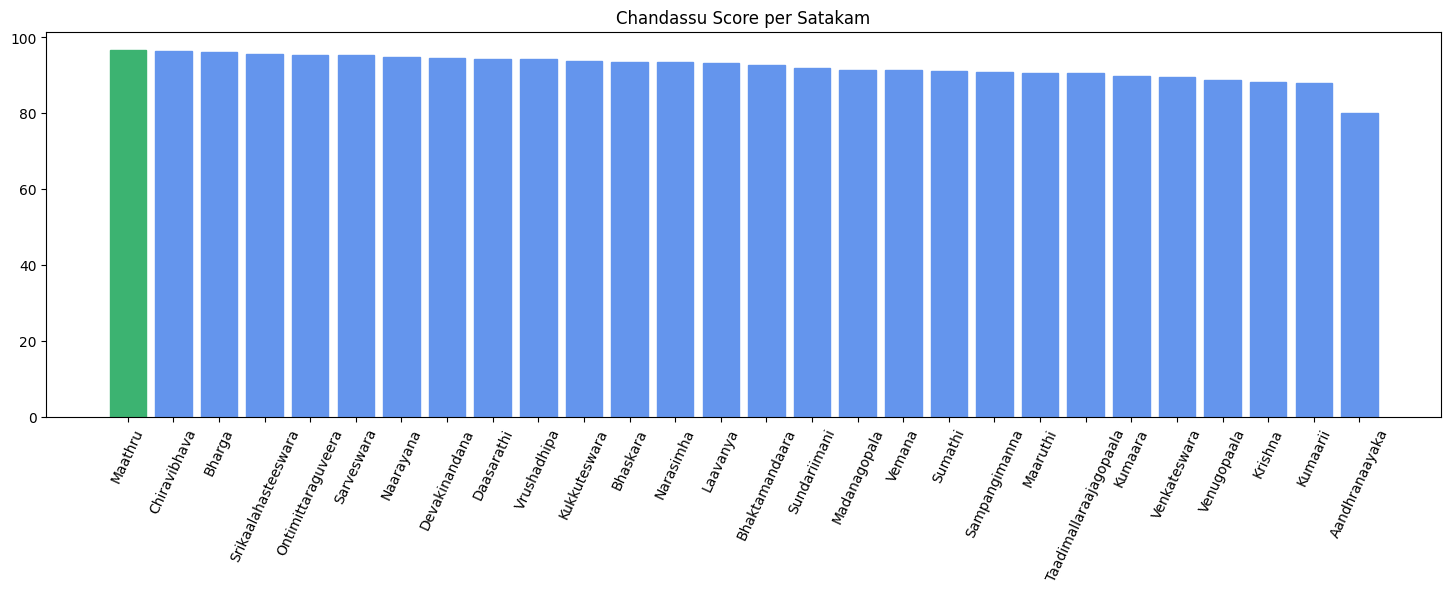

In [11]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Satakam" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [12]:
n_paadalu_score= (merged_df.groupby( "satakam" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'Aandhranaayaka': 100.0,
 'Maaruthi': 100.0,
 'Vemana': 100.0,
 'Sumathi': 100.0,
 'Srikaalahasteeswara': 100.0,
 'Sarveswara': 100.0,
 'Sampangimanna': 100.0,
 'Ontimittaraguveera': 100.0,
 'Narasimha': 100.0,
 'Naarayana': 100.0,
 'Bhaktamandaara': 100.0,
 'Maathru': 100.0,
 'Vrushadhipa': 100.0,
 'Kumaarii': 100.0,
 'Kumaara': 100.0,
 'Kukkuteswara': 100.0,
 'Krishna': 100.0,
 'Devakinandana': 100.0,
 'Daasarathi': 100.0,
 'Chiravibhava': 100.0,
 'Bhaskara': 100.0,
 'Bharga': 100.0,
 'Laavanya': 99.9375,
 'Venugopaala': 99.82142857142857,
 'Sundariimani': 99.73684210526315,
 'Taadimallaraajagopaala': 99.71153846153847,
 'Madanagopala': 99.375,
 'Venkateswara': 99.25}

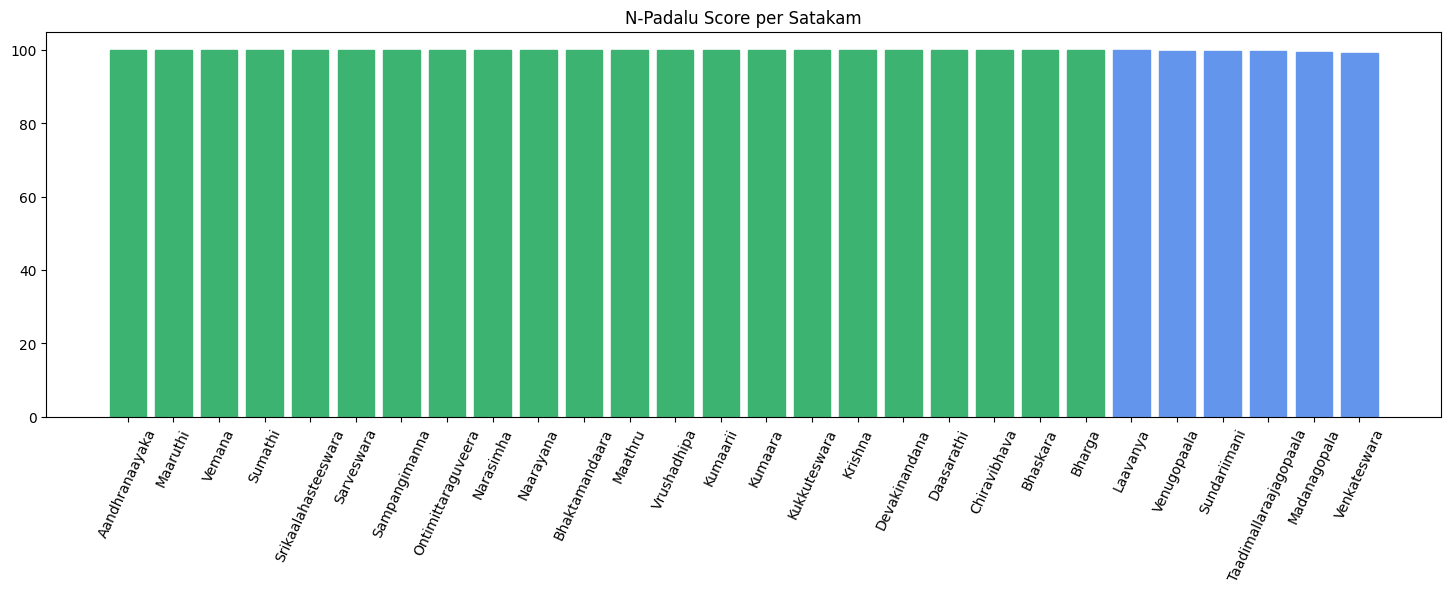

In [13]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
for i in range( 22 ):
    bars[i].set_color( "mediumseagreen" )

for i in range( 22, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Satakam" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [14]:
gana_kramam_score= (merged_df.groupby( "satakam" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'Maathru': 98.60714285714286,
 'Chiravibhava': 97.20982142857143,
 'Kukkuteswara': 96.24320652173914,
 'Laavanya': 96.0375,
 'Narasimha': 95.440625,
 'Ontimittaraguveera': 95.38690476190477,
 'Sarveswara': 95.33730158730158,
 'Bharga': 95.15558698727015,
 'Bhaskara': 95.11795543905636,
 'Madanagopala': 94.765625,
 'Vemana': 94.75479056626949,
 'Devakinandana': 94.66053748231967,
 'Daasarathi': 94.66019417475728,
 'Sumathi': 94.50231481481481,
 'Srikaalahasteeswara': 94.41776710684275,
 'Kumaara': 94.4110576923077,
 'Naarayana': 94.08163265306123,
 'Taadimallaraajagopaala': 93.22596153846153,
 'Kumaarii': 93.125,
 'Vrushadhipa': 92.82437745740498,
 'Venugopaala': 92.64880952380953,
 'Sampangimanna': 92.5,
 'Sundariimani': 92.29323308270678,
 'Krishna': 92.07920792079209,
 'Maaruthi': 90.85591133004925,
 'Bhaktamandaara': 88.22489391796323,
 'Venkateswara': 87.89285714285714,
 'Aandhranaayaka': 84.76415094339623}

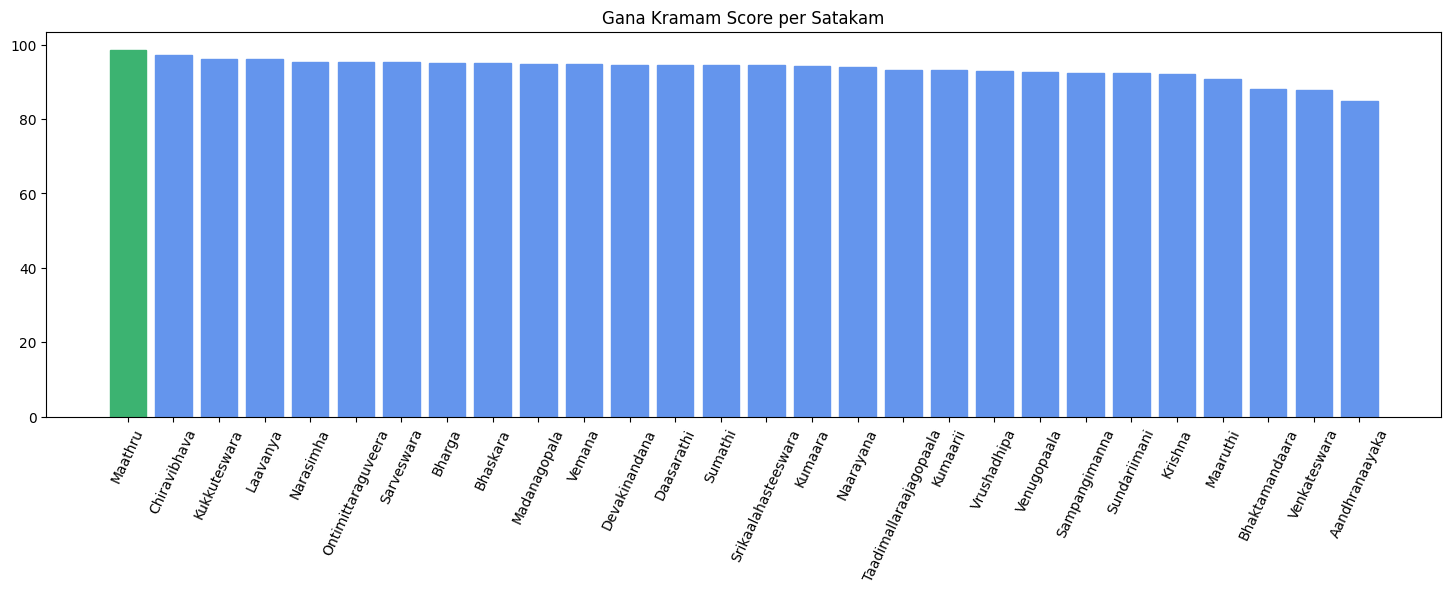

In [15]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Satakam" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [19]:
yati_sthanam_score= (merged_df.groupby( "satakam" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'Maathru': 88.5,
 'Chiravibhava': 87.5,
 'Srikaalahasteeswara': 86.76470588235294,
 'Bharga': 85.89108910891089,
 'Kukkuteswara': 85.05434782608695,
 'Narasimha': 84.75,
 'Naarayana': 84.04761904761905,
 'Ontimittaraguveera': 83.75,
 'Laavanya': 83.3125,
 'Daasarathi': 82.76699029126213,
 'Vrushadhipa': 82.56880733944955,
 'Bhaktamandaara': 82.42574257425743,
 'Devakinandana': 82.42574257425743,
 'Sarveswara': 81.77083333333334,
 'Madanagopala': 80.125,
 'Vemana': 79.11650902837489,
 'Taadimallaraajagopaala': 78.5576923076923,
 'Sumathi': 78.24074074074075,
 'Bhaskara': 77.06422018348624,
 'Sampangimanna': 76.66666666666667,
 'Sundariimani': 75.0,
 'Venugopaala': 73.39285714285714,
 'Kumaara': 72.59615384615384,
 'Venkateswara': 71.75,
 'Krishna': 71.28712871287128,
 'Kumaarii': 70.5,
 'Maaruthi': 69.61206896551724,
 'Aandhranaayaka': 55.54245283018868}

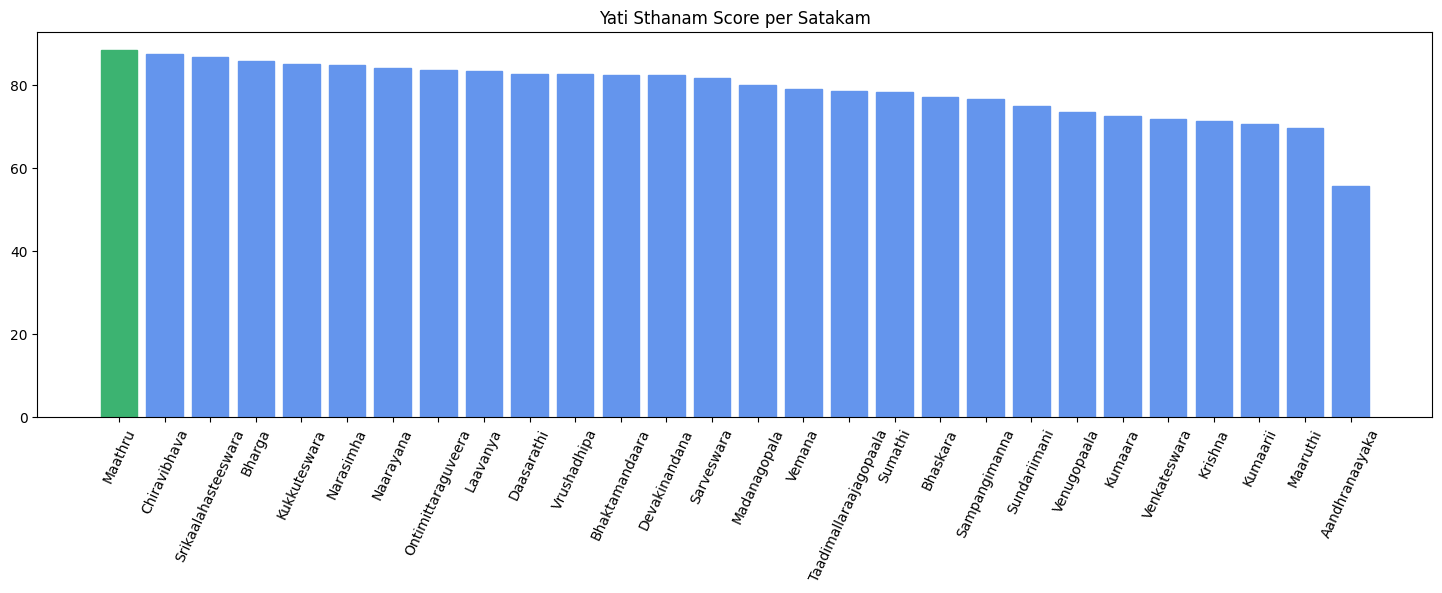

In [20]:
plt.figure( figsize= (18, 5) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Satakam" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

### Class-wise Evaluation

In [21]:
merged_df["class"].unique()

array(['vruttamu', 'vupajaathi', 'jaathi'], dtype=object)

In [22]:
chandassu_score= (merged_df.groupby( "class" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'vruttamu': 93.67373143541346,
 'vupajaathi': 90.0688369781312,
 'jaathi': 89.37358597285068}

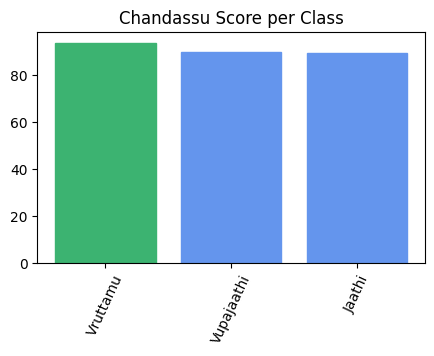

In [23]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Class" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [24]:
n_paadalu_score= (merged_df.groupby( "class" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'jaathi': 100.0, 'vruttamu': 99.9406528189911, 'vupajaathi': 99.9155069582505}

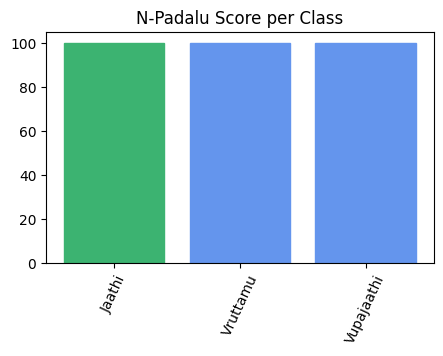

In [25]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Class" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [26]:
gana_kramam_score= (merged_df.groupby( "class" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'vupajaathi': 93.52162027833002,
 'vruttamu': 93.50519287833828,
 'jaathi': 92.82616892911011}

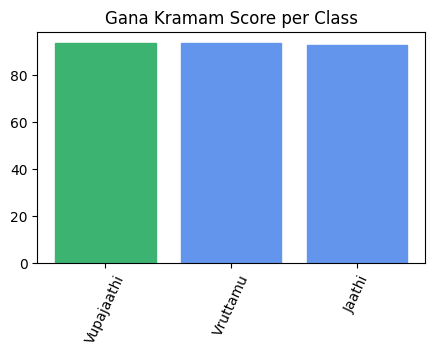

In [27]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Class" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [28]:
yati_sthanam_score= (merged_df.groupby( "class" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'vruttamu': 80.53412462908011,
 'vupajaathi': 76.76938369781313,
 'jaathi': 73.90648567119156}

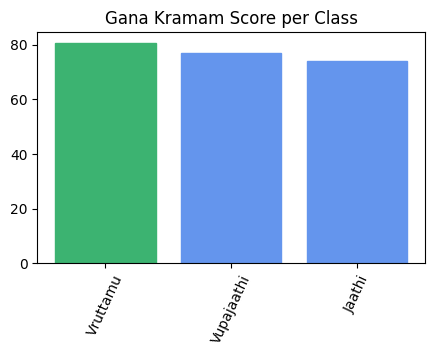

In [29]:
plt.figure( figsize= (5, 3) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Class" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

### Type-wise Evaluation

In [30]:
merged_df.head(1)

,type,padyam,class,satakam,lg,chandassu_score,n_aksharalu_score,n_paadalu_score,gana_kramam_score,yati_sthanam_score,prasa_score
0,seesamu,శ్రీమదనంత లక్ష్మీ యుతోరః స్థల- చతురాననాండ పూరి...,vruttamu,Aandhranaayaka,"[('శ్రీ', 'U'), ('మ', '|'), ('ద', '|'), ('నం',...",0.802083,-1.0,1.0,0.78125,0.625,-1.0


In [31]:
chandassu_score= (merged_df.groupby( "type" )["chandassu_score"].mean().sort_values( ascending= False )*100).to_dict()
chandassu_score

{'champakamaala': 94.9467499081895,
 'mattebhamu': 94.41028015744386,
 'saardulamu': 94.2938812548613,
 'vutpalamaala': 92.5,
 'aataveladi': 91.8676716917923,
 'seesamu': 89.64893958868895,
 'kandamu': 89.39192898975111,
 'teytageethi': 87.52557544757032}

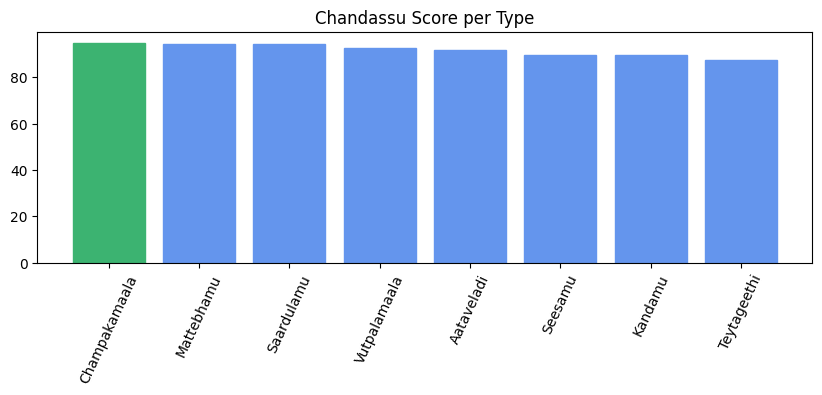

In [33]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(chandassu_score)), chandassu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Chandassu Score per Type" )
plt.xticks( range(len(chandassu_score)), [i.title() for i in chandassu_score.keys() ], rotation= 65 )
plt.show()

In [34]:
n_paadalu_score= (merged_df.groupby( "type" )["n_paadalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_paadalu_score

{'aataveladi': 100.0,
 'champakamaala': 100.0,
 'kandamu': 100.0,
 'mattebhamu': 100.0,
 'saardulamu': 100.0,
 'teytageethi': 99.87212276214834,
 'seesamu': 99.85539845758355,
 'vutpalamaala': 99.69604863221885}

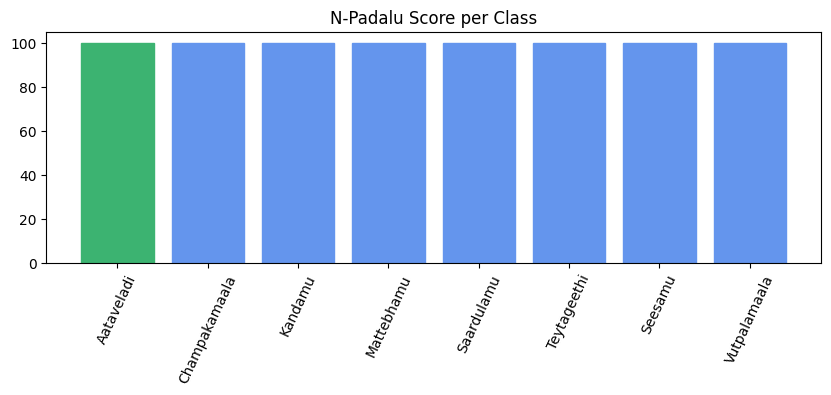

In [35]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(n_paadalu_score)), n_paadalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "N-Padalu Score per Class" )
plt.xticks( range(len(n_paadalu_score)), [i.title() for i in n_paadalu_score.keys() ], rotation= 65 )
plt.show()

In [36]:
gana_kramam_score= (merged_df.groupby( "type" )["gana_kramam_score"].mean().sort_values( ascending= False )*100).to_dict()
gana_kramam_score

{'champakamaala': 96.01542416452442,
 'aataveladi': 95.42713567839196,
 'saardulamu': 94.8768472906404,
 'seesamu': 93.0952763496144,
 'mattebhamu': 92.88608474183839,
 'kandamu': 92.85322108345534,
 'vutpalamaala': 91.8693009118541,
 'teytageethi': 90.93350383631714}

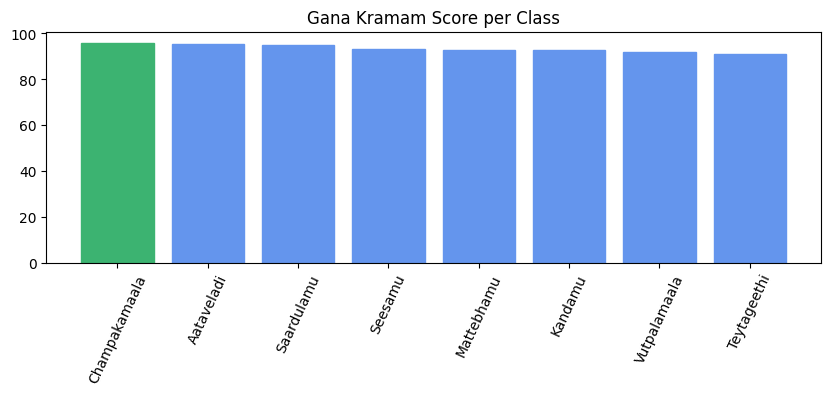

In [37]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(gana_kramam_score)), gana_kramam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Gana Kramam Score per Class" )
plt.xticks( range(len(gana_kramam_score)), [i.title() for i in gana_kramam_score.keys() ], rotation= 65 )
plt.show()

In [38]:
yati_sthanam_score= (merged_df.groupby( "type" )["yati_sthanam_score"].mean().sort_values( ascending= False )*100).to_dict()
yati_sthanam_score

{'champakamaala': 83.48329048843188,
 'mattebhamu': 83.0226904376013,
 'aataveladi': 80.17587939698493,
 'saardulamu': 79.65517241379311,
 'vutpalamaala': 77.35562310030394,
 'seesamu': 75.99614395886888,
 'kandamu': 73.9385065885798,
 'teytageethi': 71.77109974424553}

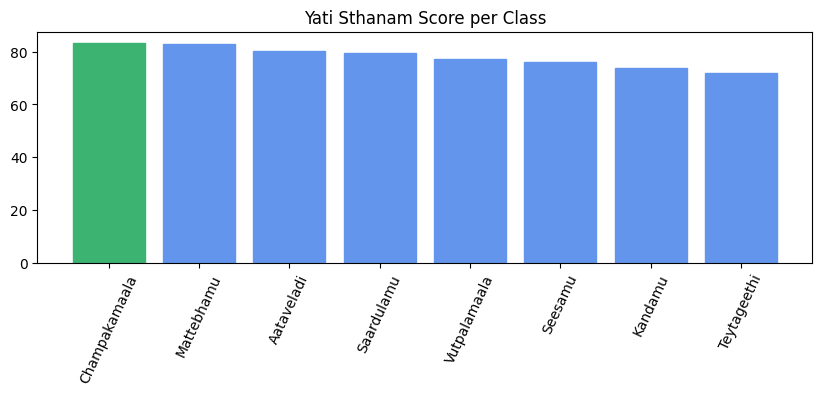

In [39]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(yati_sthanam_score)), yati_sthanam_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(yati_sthanam_score)), [i.title() for i in yati_sthanam_score.keys() ], rotation= 65 )
plt.show()

In [40]:
merged_df["type"].unique()

array(['seesamu', 'teytageethi', 'saardulamu', 'mattebhamu',
       'vutpalamaala', 'champakamaala', 'kandamu', 'aataveladi'],
      dtype=object)

### Vruttamu Padyams

In [42]:
VRUTTAMU= ['saardulamu', 'mattebhamu', 'vutpalamaala', 'champakamaala']

In [45]:
v_df= merged_df[ merged_df["type"].isin( VRUTTAMU ) ]

In [48]:
n_aksharalu_score= (v_df.groupby( "type" )["n_aksharalu_score"].mean().sort_values( ascending= False )*100).to_dict()
n_aksharalu_score

{'mattebhamu': 99.62722852512155,
 'champakamaala': 99.54094748439222,
 'saardulamu': 99.35117967332123,
 'vutpalamaala': 98.97416413373861}

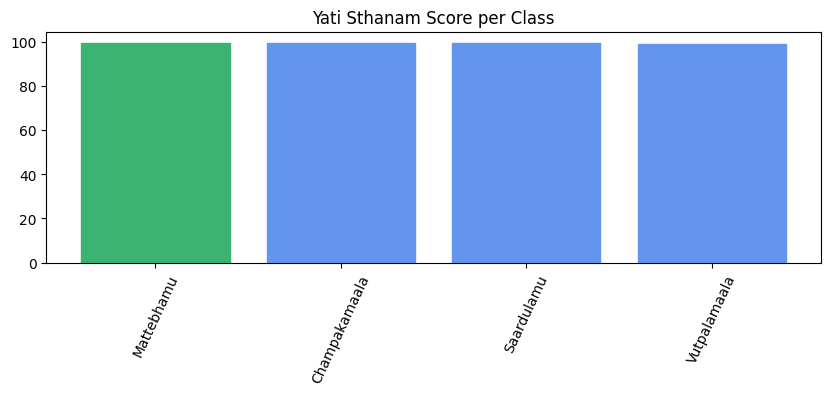

In [49]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(n_aksharalu_score)), n_aksharalu_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(n_aksharalu_score)), [i.title() for i in n_aksharalu_score.keys() ], rotation= 65 )
plt.show()

In [51]:
prasa_score= (v_df.groupby( "type" )["prasa_score"].mean().sort_values( ascending= False )*100).to_dict()
prasa_score

{'saardulamu': 97.58620689655172,
 'mattebhamu': 96.51539708265803,
 'champakamaala': 95.69408740359897,
 'vutpalamaala': 94.6048632218845}

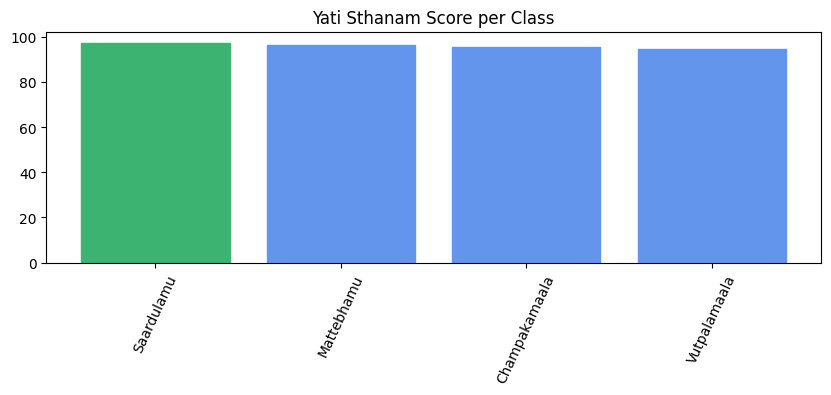

In [52]:
plt.figure( figsize= (10, 3) )
bars= plt.bar( range(len(prasa_score)), prasa_score.values() )
bars[0].set_color("mediumseagreen")
for i in range( 1, len(bars) ):
    bars[i].set_color( "cornflowerblue" )

plt.title( "Yati Sthanam Score per Class" )
plt.xticks( range(len(prasa_score)), [i.title() for i in prasa_score.keys() ], rotation= 65 )
plt.show()

### End
---